In [95]:
import pandas as pd

df = pd.read_csv("IA.csv")

df.dtypes

Country                                        object
Year                                            int64
Industry                                       object
AI Adoption Rate (%)                          float64
AI-Generated Content Volume (TBs per year)    float64
Job Loss Due to AI (%)                        float64
Revenue Increase Due to AI (%)                float64
Human-AI Collaboration Rate (%)               float64
Top AI Tools Used                              object
Regulation Status                              object
Consumer Trust in AI (%)                      float64
Market Share of AI Companies (%)              float64
dtype: object

In [96]:
df.drop(columns=["Revenue Increase Due to AI (%)"], inplace=True)
df.drop(columns=["Human-AI Collaboration Rate (%)"], inplace=True)
df.drop(columns=["Top AI Tools Used"], inplace=True)
df.drop(columns=["Consumer Trust in AI (%)"], inplace=True)
df.drop(columns=["Market Share of AI Companies (%)"], inplace=True)

In [97]:
df.rename(columns={'AI Adoption Rate (%)': 'AI Adoption Rate', 'AI-Generated Content Volume (TBs per year)': 'AI-Generated Content Volume', 'Job Loss Due to AI (%)': 'Job Loss Due to AI'}, inplace=True)

In [98]:
import numpy as np

for col in ['Year', 'Regulation Status', 'Job Loss Due to AI']:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

df = pd.concat([df, df.sample(5, random_state=42)], ignore_index=True)

In [99]:
df[:75].to_csv("IA1.csv", index=False)
df[75:].to_csv("IA2.csv", index=False)

In [100]:
df1 = pd.read_csv("IA1.csv")
df2 = pd.read_csv("IA2.csv")

df1.head()

,Country,Year,Industry,AI Adoption Rate,AI-Generated Content Volume,Job Loss Due to AI,Regulation Status
0,South Korea,2022.0,Media,44.29,33.09,16.77,Strict
1,China,2025.0,Legal,34.75,66.74,46.89,Strict
2,USA,2022.0,Automotive,81.06,96.13,10.66,Moderate
3,France,2021.0,Legal,85.24,93.76,27.70,Moderate
4,France,2021.0,Gaming,78.95,45.62,17.45,Strict


In [101]:
df2.head()

,Country,Year,Industry,AI Adoption Rate,AI-Generated Content Volume,Job Loss Due to AI,Regulation Status
0,UK,2023.0,Education,82.82,75.53,22.34,Strict
1,South Korea,2023.0,Legal,75.42,24.03,28.82,Lenient
2,China,2021.0,Gaming,13.90,51.20,49.71,Moderate
3,Japan,2024.0,Manufacturing,82.72,17.97,23.56,Strict
4,India,2021.0,Education,63.04,82.49,6.68,NaN


In [102]:
print("Valores nulos df1:\n", df1.isnull().sum())

Valores nulos df1:
 Country                         0
Year                            9
Industry                        0
AI Adoption Rate                0
AI-Generated Content Volume     0
Job Loss Due to AI             10
Regulation Status              10
dtype: int64


In [103]:
print("Valores nulos df2:\n", df2.isnull().sum())

Valores nulos df2:
 Country                         0
Year                           11
Industry                        0
AI Adoption Rate                0
AI-Generated Content Volume     0
Job Loss Due to AI             11
Regulation Status              11
dtype: int64


In [104]:
print("Valores duplicados df1:\n", df1.duplicated().sum())

Valores duplicados df1:
 0


In [105]:
print("Valores duplicados df2:\n", df2.duplicated().sum())

Valores duplicados df2:
 3


In [112]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

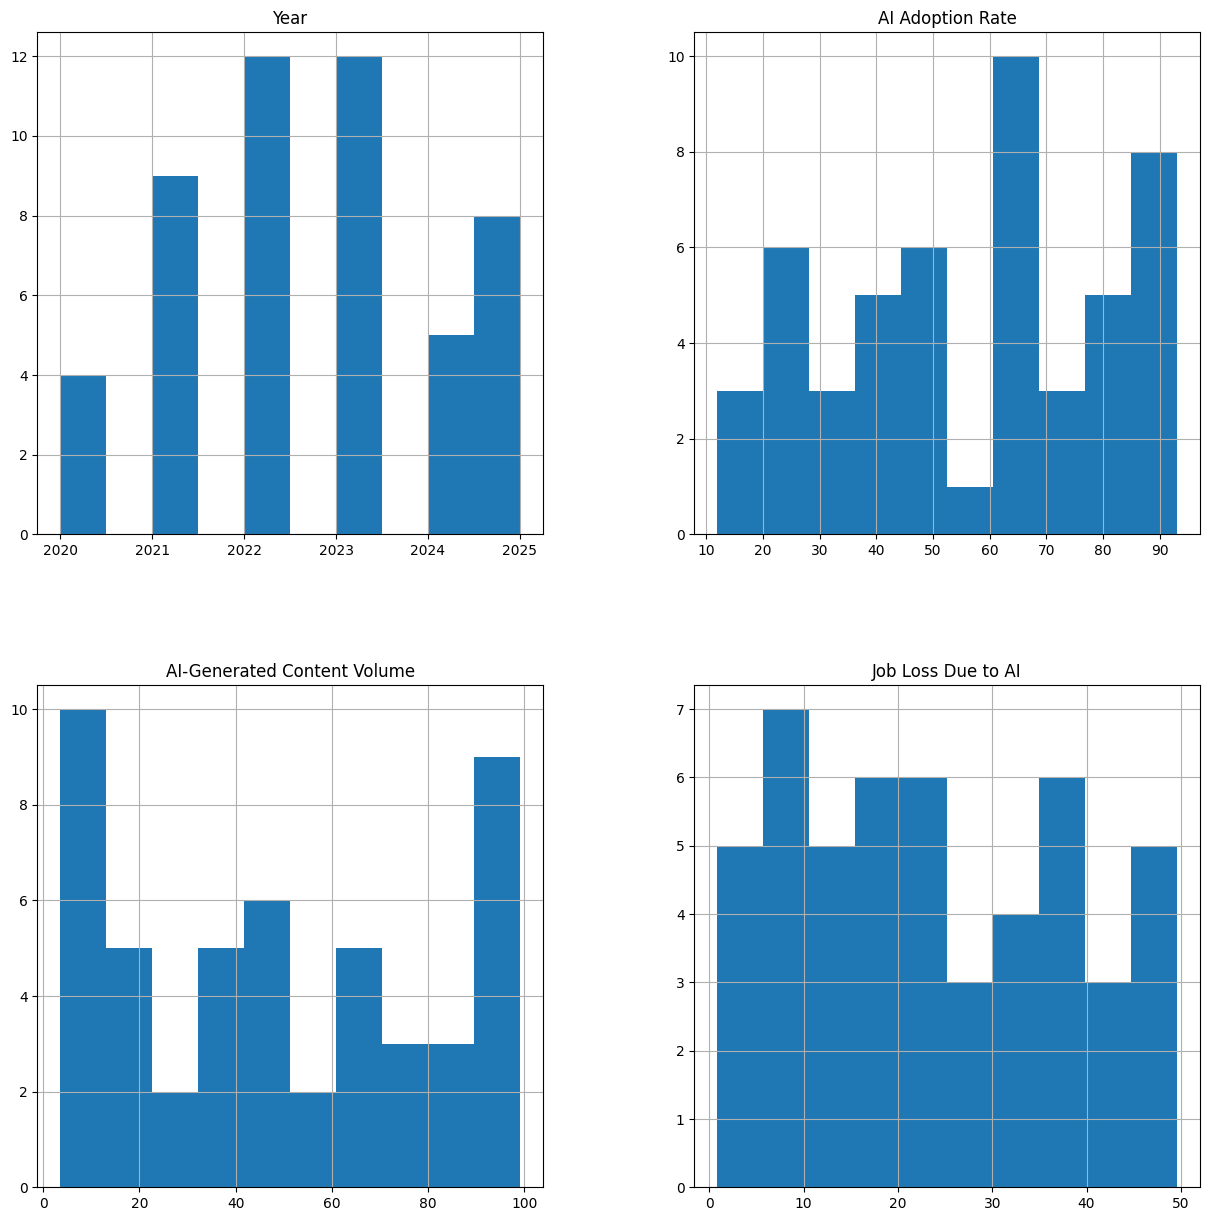

In [115]:
df1.hist(figsize=(15,15)) 
plt.show()

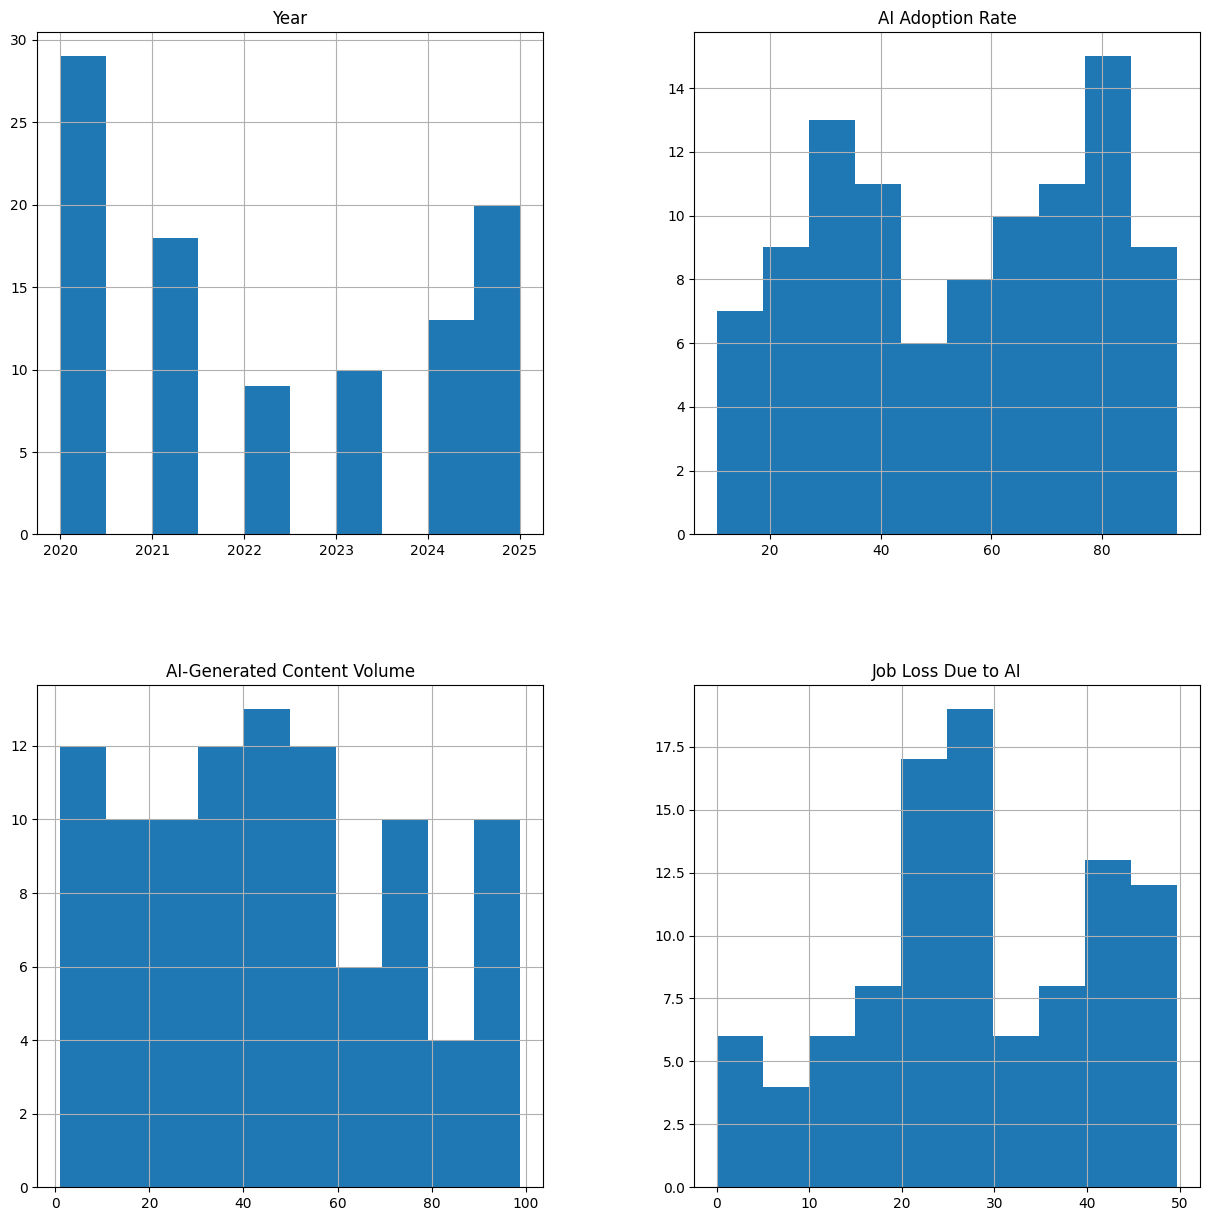

In [116]:
df2.hist(figsize=(15,15)) 
plt.show()

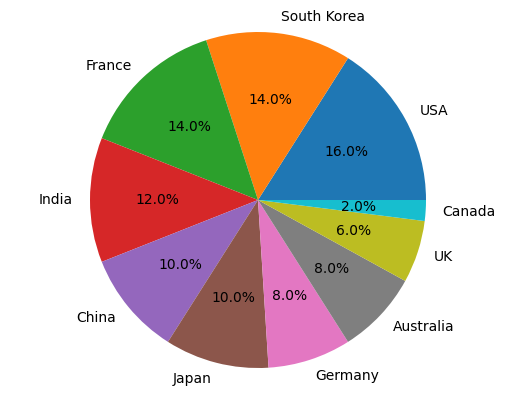

In [118]:
occupation_counts = df1['Country'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

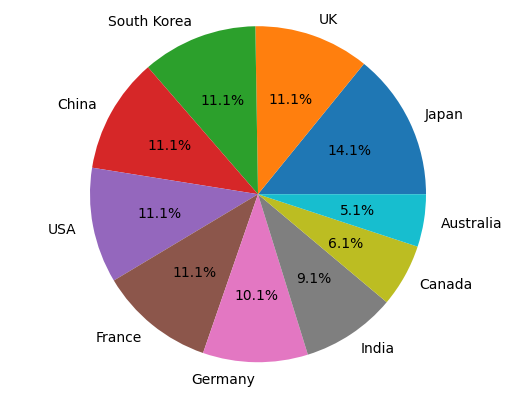

In [119]:
occupation_counts = df2['Country'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

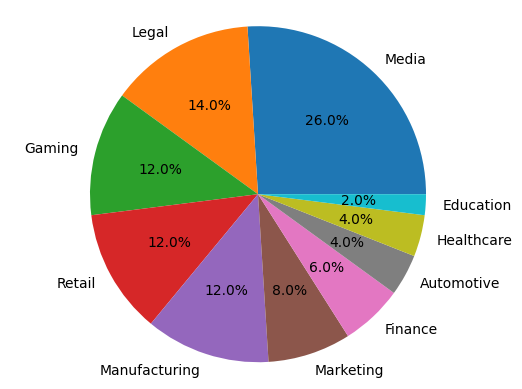

In [120]:
occupation_counts = df1['Industry'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

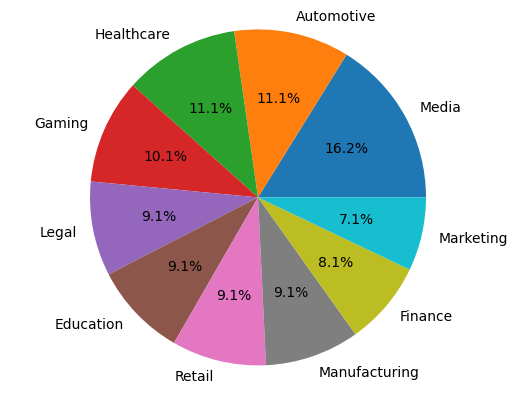

In [121]:
occupation_counts = df2['Industry'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

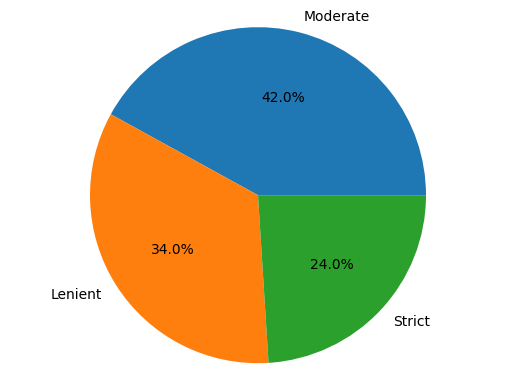

In [122]:
occupation_counts = df1['Regulation Status'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

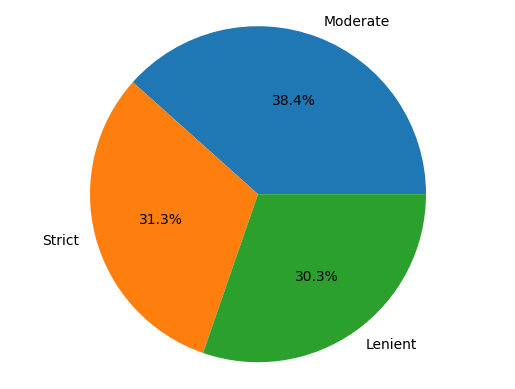

In [123]:
occupation_counts = df2['Regulation Status'].value_counts()

plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

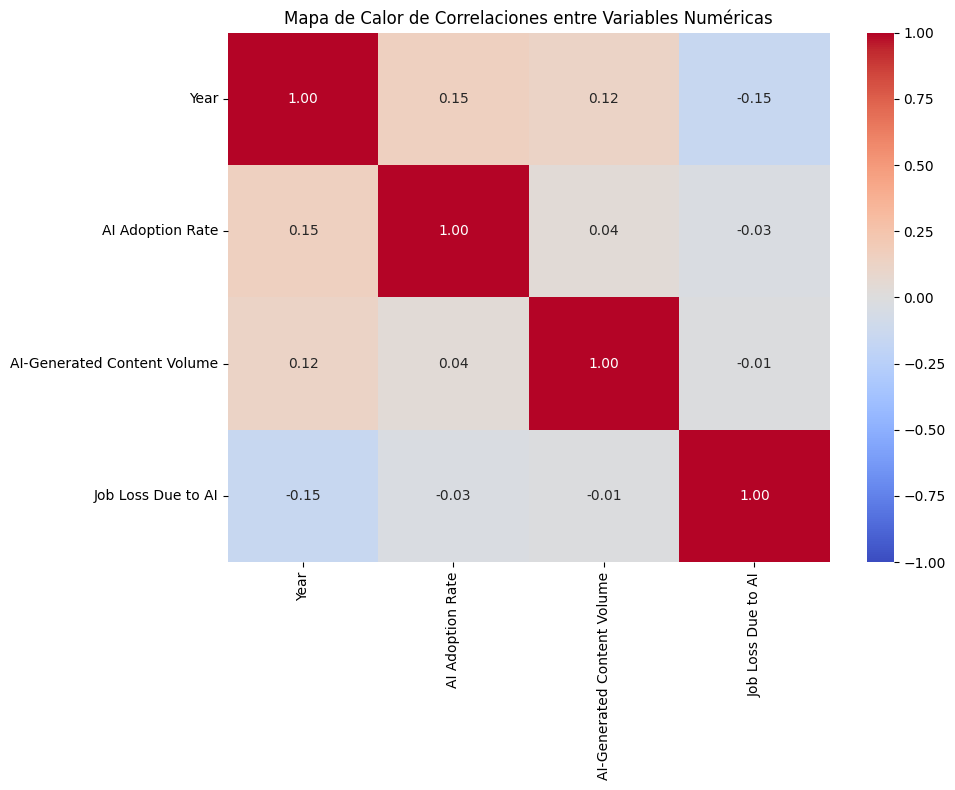

In [137]:
numericas = df2.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

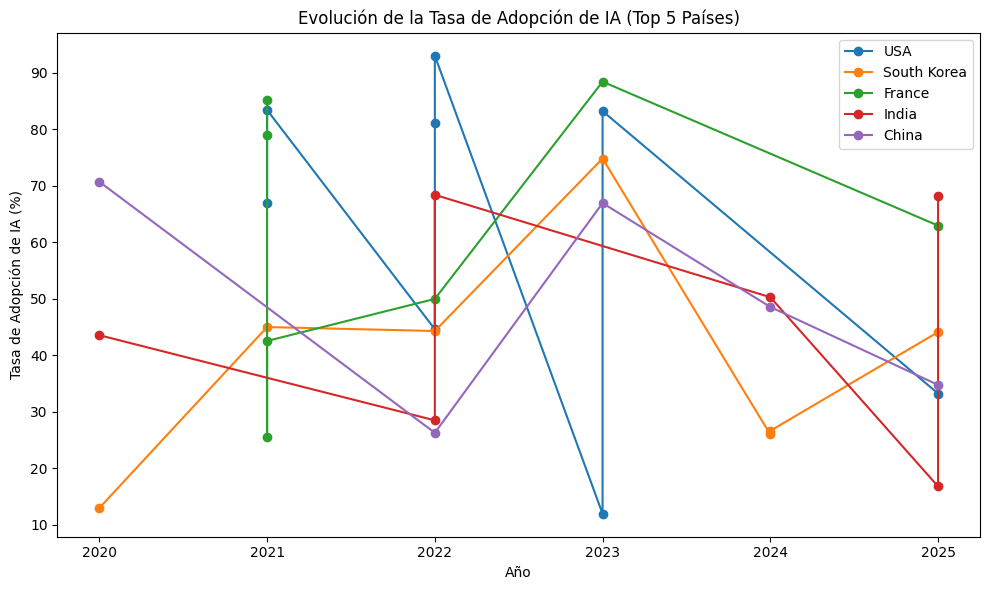

In [133]:
top_countries = df1['Country'].value_counts().nlargest(5).index
plt.figure(figsize=(10,6))
for country in top_countries:
    subset = df1[df1['Country'] == country].sort_values('Year')
    plt.plot(subset['Year'], subset['AI Adoption Rate'], label=country, marker='o')
plt.title('Evolución de la Tasa de Adopción de IA (Top 5 Países)')
plt.xlabel('Año')
plt.ylabel('Tasa de Adopción de IA (%)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\jcanadas\AppData\Local\Temp\ipykernel_28936\1263932203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_volume.values, y=avg_volume.index, palette='coolwarm')


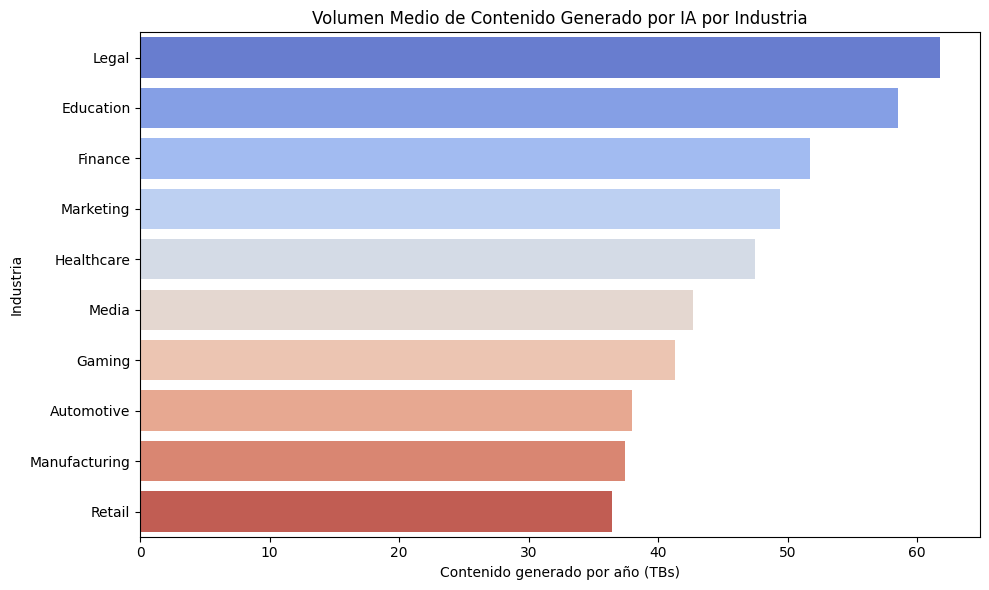

In [134]:
plt.figure(figsize=(10,6))
avg_volume = df2.groupby('Industry')['AI-Generated Content Volume'].mean().sort_values(ascending=False)
sns.barplot(x=avg_volume.values, y=avg_volume.index, palette='coolwarm')
plt.title('Volumen Medio de Contenido Generado por IA por Industria')
plt.xlabel('Contenido generado por año (TBs)')
plt.ylabel('Industria')
plt.tight_layout()
plt.show()


C:\Users\jcanadas\AppData\Local\Temp\ipykernel_28936\4165959489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='Regulation Status', y='Job Loss Due to AI', palette='Set2')


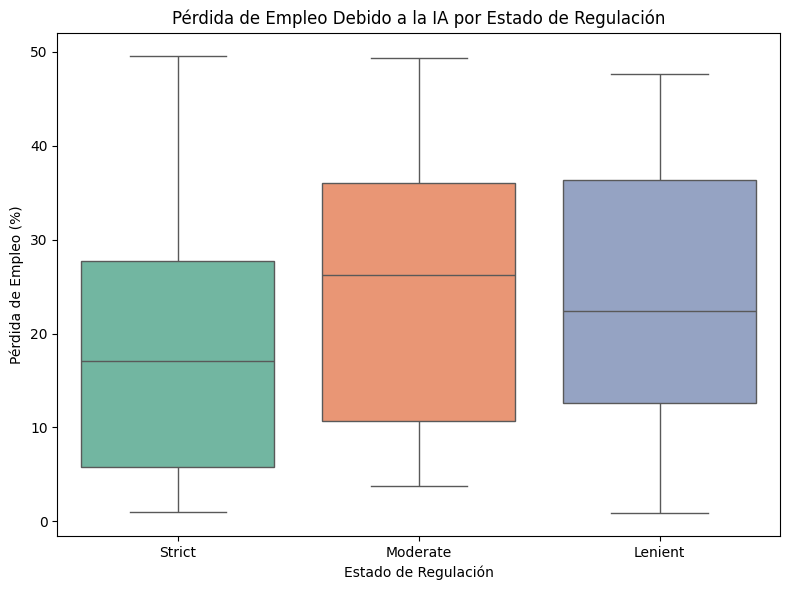

In [135]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1, x='Regulation Status', y='Job Loss Due to AI', palette='Set2')
plt.title('Pérdida de Empleo Debido a la IA por Estado de Regulación')
plt.xlabel('Estado de Regulación')
plt.ylabel('Pérdida de Empleo (%)')
plt.tight_layout()
plt.show()

C:\Users\jcanadas\AppData\Local\Temp\ipykernel_28936\3872706850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='Industry', y='Job Loss Due to AI', palette='Set2')


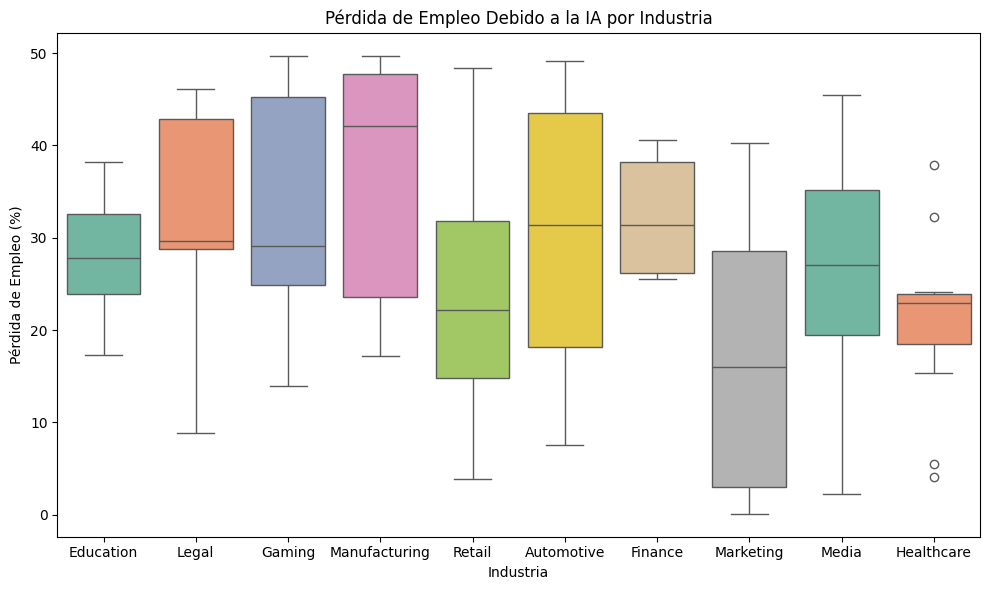

In [144]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df2, x='Industry', y='Job Loss Due to AI', palette='Set2')
plt.title('Pérdida de Empleo Debido a la IA por Industria')
plt.xlabel('Industria')
plt.ylabel('Pérdida de Empleo (%)')
plt.tight_layout()
plt.show()